* 1.데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, "PRP" 변수를 예측하는 LinearRegression 기반 다중 선형 회귀 모델링을 프로그래밍 하시오.
* - 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 훈련데이터 학습과정, 교차 검증, 분석 결과 시각화 등을 포함하여 최적화 하는 전체 과정을 포함하시오

  Vendor name Model name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0  VendorName  ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  NaN
1     adviser      32/60   125   256   6000   256     16    128  198  NaN
2      amdahl     470v/7    29  8000  32000    32      8     32  269  NaN
3      amdahl    470v/7a    29  8000  32000    32      8     32  220  NaN
4      amdahl    470v/7b    29  8000  32000    32      8     32  172  NaN
       ERP
count  0.0
mean   NaN
std    NaN
min    NaN
25%    NaN
50%    NaN
75%    NaN
max    NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vendor name  210 non-null    object 
 1   Model name   210 non-null    object 
 2   MYCT         210 non-null    object 
 3   MMIN         210 non-null    object 
 4   MMAX         210 non-null    object 
 5   CACH         210 non-null    object 
 6   CHMIN      

C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\1070020085.py:89: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\1070020085.py:89: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\1070020085.py:89: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\1070020085.py:89: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\1070020085.py:89: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\1070020085.py:89: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  plt.tight_layout

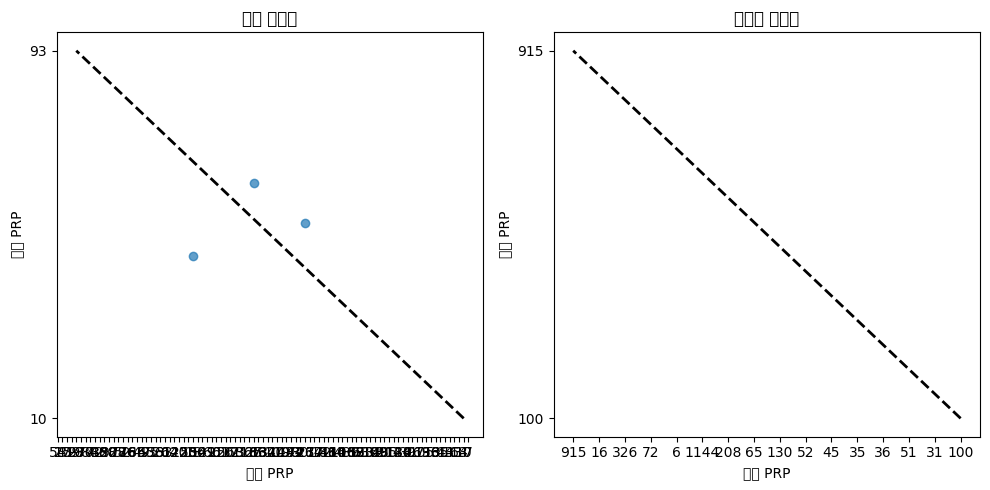

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
columns = ["Vendor name", "Model name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv('machine.data.csv', names=columns)

# 데이터 탐색
print(data.head())
print(data.describe())
print(data.info())

# 필요한 특성 선택 (모델링을 위해 문자형 변수 제거)
features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
target = "PRP"

# 특성과 타겟 분리
X = data[features]
y = data[target]

# 결측치 확인 및 제거
print(X.isnull().sum())
print(y.isnull().sum())

X = X.dropna()
y = y.dropna()

# 숫자가 아닌 값 확인 및 제거
for col in features:
    print(f"{col} unique values: {X[col].unique()}")

# 숫자가 아닌 값이 있는 경우 제거 또는 변환
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()

# 스케일링 전 데이터 형식 확인
print(X.dtypes)

# 특성 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# y의 인덱스를 X의 인덱스와 일치시키기
y = y[X.index]

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 초기화
model = LinearRegression()

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
print(f'교차 검증 R^2 점수: {cv_scores}')
print(f'평균 교차 검증 R^2 점수: {cv_scores.mean()}')

# 모델 훈련
model.fit(X_train, y_train)

# 예측
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 결과 시각화
plt.figure(figsize=(10, 5))

# 실제 vs 예측 (훈련 데이터)
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('실제 PRP')
plt.ylabel('예측 PRP')
plt.title('훈련 데이터')

# 실제 vs 예측 (테스트 데이터)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('실제 PRP')
plt.ylabel('예측 PRP')
plt.title('테스트 데이터')

plt.tight_layout()
plt.show()

2. (1) 단계에서 얻은 다중 선형 회귀 모델을 사용하여 학습 데이터와 테스트 데이터 각각대해 이 모델의 성능을 평가하시오.

In [2]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f'훈련 데이터 MSE: {train_mse}')
print(f'테스트 데이터 MSE: {test_mse}')
print(f'훈련 데이터 MAE: {train_mae}')
print(f'테스트 데이터 MAE: {test_mae}')
print(f'훈련 데이터 R^2: {train_r2}')
print(f'테스트 데이터 R^2: {test_r2}')

훈련 데이터 MSE: 3117.6589054301776
테스트 데이터 MSE: 5633.068155793271
훈련 데이터 MAE: 35.12200634651681
테스트 데이터 MAE: 48.06880134700474
훈련 데이터 R^2: 0.8378284557995717
테스트 데이터 R^2: 0.8893455830696771


3. (2) 단계에서 얻은 모델의 테스트 데이터에 대해 R^2가 90% 이상이 나오도록 모델을 개선하시오.

In [8]:
from sklearn.linear_model import Ridge

# Ridge Regression 모델 초기화
model_ridge = Ridge(alpha=1.0)  # alpha는 규제 강도를 조절하는 매개변수입니다. 조정이 필요할 수 있습니다.

# 모델 훈련
model_ridge.fit(X_train, y_train)

# 예측
y_pred_train_ridge = model_ridge.predict(X_train)
y_pred_test_ridge = model_ridge.predict(X_test)

# 테스트 데이터 R^2 계산
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(f'테스트 데이터 R^2 점수 (Ridge Regression): {r2_test_ridge}')

테스트 데이터 R^2 점수 (Ridge Regression): 0.8885286863069447


  Vendor name Model name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0  VendorName  ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  NaN
1     adviser      32/60   125   256   6000   256     16    128  198  NaN
2      amdahl     470v/7    29  8000  32000    32      8     32  269  NaN
3      amdahl    470v/7a    29  8000  32000    32      8     32  220  NaN
4      amdahl    470v/7b    29  8000  32000    32      8     32  172  NaN
       ERP
count  0.0
mean   NaN
std    NaN
min    NaN
25%    NaN
50%    NaN
75%    NaN
max    NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vendor name  210 non-null    object 
 1   Model name   210 non-null    object 
 2   MYCT         210 non-null    object 
 3   MMIN         210 non-null    object 
 4   MMAX         210 non-null    object 
 5   CACH         210 non-null    object 
 6   CHMIN      

C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  plt.tight_layout()
C:\Use

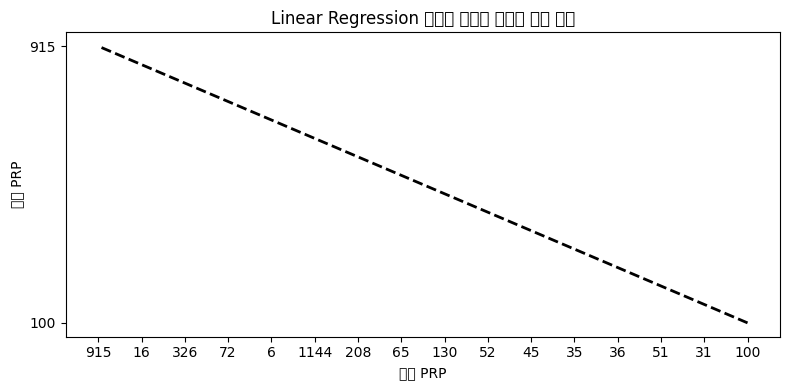

모델: Ridge Regression
교차 검증 평균 R^2 점수: 0.5730702188805401
훈련 데이터 R^2 점수: 0.8378104131299453
테스트 데이터 R^2 점수: 0.8885286863069447
-------------------------------------------------------


C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  plt.tight_layout()
C:\Use

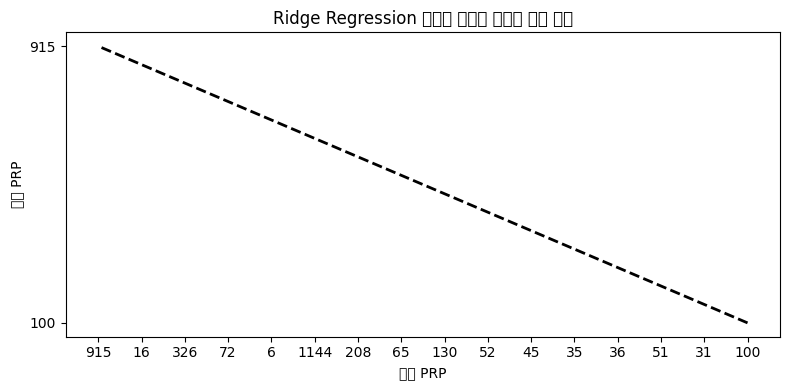

모델: Lasso Regression
교차 검증 평균 R^2 점수: 0.5816935147501735
훈련 데이터 R^2 점수: 0.8375648408890113
테스트 데이터 R^2 점수: 0.8859785931305194
-------------------------------------------------------


C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  plt.tight_layout()
C:\Use

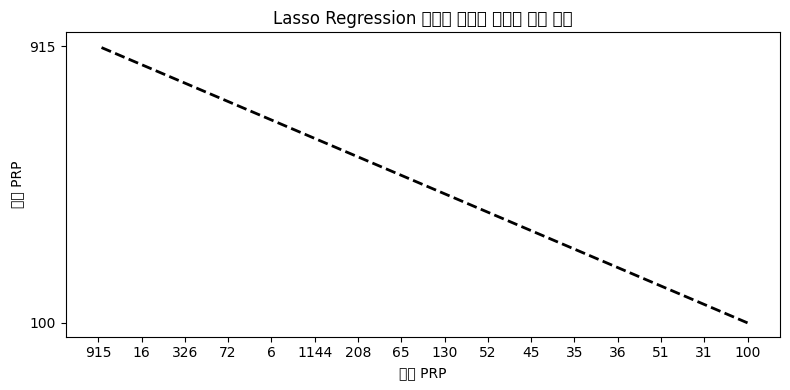

모델: Random Forest
교차 검증 평균 R^2 점수: 0.7946679543879636
훈련 데이터 R^2 점수: 0.9566234133114869
테스트 데이터 R^2 점수: 0.8657278240323845
-------------------------------------------------------


C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  plt.tight_layout()
C:\Users\dnjsg\AppData\Local\Temp\ipykernel_31172\182871790.py:99: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from current font.
  plt.tight_layout()
C:\Use

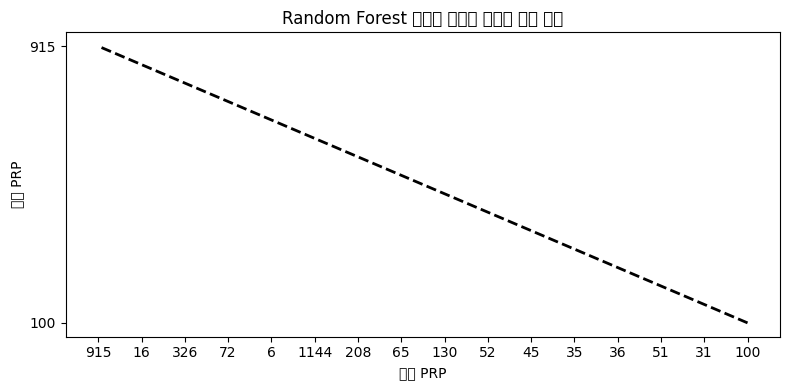

최적 모델: Random Forest, 평균 교차 검증 R^2 점수: 0.7946679543879636


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 데이터 불러오기
columns = ["Vendor name", "Model name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data = pd.read_csv('machine.data.csv', names=columns)

# 데이터 탐색
print(data.head())
print(data.describe())
print(data.info())

# 필요한 특성 선택 (모델링을 위해 문자형 변수 제거)
features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
target = "PRP"

# 특성과 타겟 분리
X = data[features]
y = data[target]

# 결측치 확인 및 제거
print(X.isnull().sum())
print(y.isnull().sum())

X = X.dropna()
y = y.dropna()

# 숫자가 아닌 값 확인 및 제거
for col in features:
    print(f"{col} unique values: {X[col].unique()}")

# 숫자가 아닌 값이 있는 경우 제거 또는 변환
X = X.apply(pd.to_numeric, errors='coerce')
X = X.dropna()

# 스케일링 전 데이터 형식 확인
print(X.dtypes)

# 특성 스케일링 (StandardScaler 사용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# y의 인덱스를 X의 인덱스와 일치시키기
y = y.loc[X.index]

# 데이터 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 초기화 및 파이프라인 설정
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

# 모델 학습 및 평가
results = {}
for model_name, model in models.items():
    pipeline = Pipeline([
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    
    # 교차 검증
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='r2')
    results[model_name] = cv_scores.mean()
    
    # 예측
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # 성능 평가
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # 결과 출력
    print(f"모델: {model_name}")
    print(f"교차 검증 평균 R^2 점수: {cv_scores.mean()}")
    print(f"훈련 데이터 R^2 점수: {train_r2}")
    print(f"테스트 데이터 R^2 점수: {test_r2}")
    print("-------------------------------------------------------")
    
    # 결과 시각화 (테스트 데이터)
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, y_pred_test, color='blue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('실제 PRP')
    plt.ylabel('예측 PRP')
    plt.title(f'{model_name} 모델의 테스트 데이터 예측 결과')
    plt.tight_layout()
    plt.show()

# 최적 모델 선택 (교차 검증 결과 기준)
best_model = max(results, key=results.get)
print(f"최적 모델: {best_model}, 평균 교차 검증 R^2 점수: {results[best_model]}")